<a href="https://colab.research.google.com/github/BorysZhyhalo/All-Python-codes-of-ZTM-course-by-Andrei-Neagoie/blob/master/Lesson5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Visualization using *Seaborm*

Gallery with code is [here](https://seaborn.pydata.org/examples/index.html)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme()

In [ ]:
sns.load_dataset("penguins")

ValueError: 'penguins' is not one of the example datasets.

In [ ]:
penguins = sns.load_dataset("penguins")

ValueError: 'penguins' is not one of the example datasets.

More examples with this dataset is [here](https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn)

In [ ]:
penguins.head()

In [ ]:
# pairplot is scatterplot from Matplotlib analogue
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

In [ ]:

sns.pairplot(data=penguins, hue="species");

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

In [ ]:
g = sns.PairGrid(penguins.dropna())

g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef);

We can change theme and add some settings

In [ ]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True);

## EDA

**EDA stages**

- Feature identification and their data types
- Structure Investigation
  - Structure of non-numerical features
  - Structure of numerical features
  - Statistical characteristics of the features
- Quality Investigation
  - Duplicates
  - Missing values
  - Unwanted entries and recording errors
- Content Investigation
  - Feature distribution
  - Feature patterns
  - Feature relationships

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Continue work with [Health Insurance Cross Sell Prediction](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?resource=download&select=test.csv) dataset
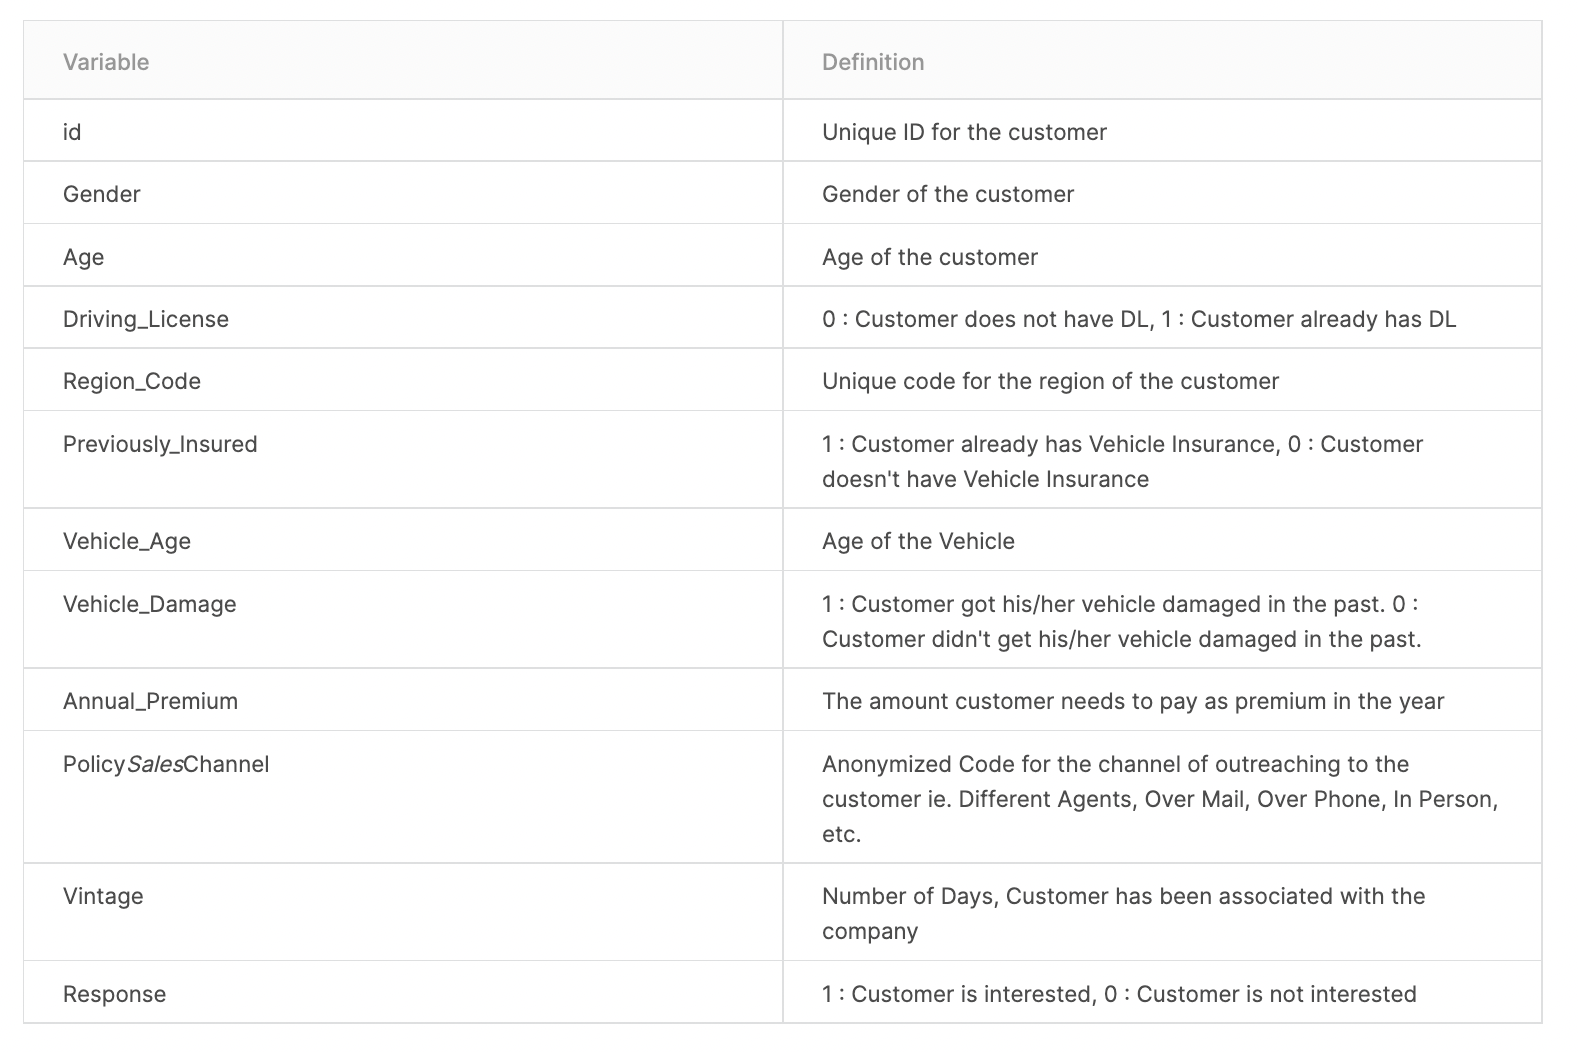

We already know lots of functions for EDA. Lets go through the process

In [ ]:
df = pd.read_csv('train.csv')

### Quick data overview

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.shape

### Statistical data summay

In [ ]:
df.describe()

### Data types

In [ ]:
df.dtypes

From the common sense we see that not all columns have appropriate data type

In [ ]:
df.Vehicle_Damage.value_counts()

In [ ]:
# this does not work
df.Vehicle_Damage.astype(bool)

In [ ]:
df.Vehicle_Damage

In [ ]:
int(df.Vehicle_Damage.loc[0]=='Yes')

In [ ]:
df.Vehicle_Damage = df.Vehicle_Damage.apply(lambda x: int(x=='Yes'))

In [ ]:
df.Vehicle_Damage.astype(bool)

In [ ]:
df.head()

In [ ]:
df.Vehicle_Age.value_counts()

In [ ]:
df.Vehicle_Age = pd.Categorical(df.Vehicle_Age,
                                categories=['< 1 Year', '1-2 Year', '> 2 Years'],
                                ordered=True)

In [ ]:
df.Vehicle_Age

In [ ]:
to_category = ['id', 'Region_Code', 'Policy_Sales_Channel']
bool_cols = ['Previously_Insured', 'Driving_License', 'Response', 'Vehicle_Damage']

In [ ]:
for c in to_category:
    df[c] = df[c].astype(str)

In [ ]:
df.Region_Code


In [ ]:
df.dtypes

In [ ]:
cat_cols = df.select_dtypes(['object', 'bool', 'category']).columns
num_cols = df.select_dtypes(['int', 'float']).columns

cat_cols, num_cols

In [ ]:
np.setdiff1d(num_cols, bool_cols)

In [ ]:
df[np.setdiff1d(num_cols, bool_cols)].hist(figsize=(15,10))
plt.tight_layout()

Бачимо, що змінна Vintage в даному масштабі рівномірно розподілена за різними значеннями. Варто також дослідити значення її стандартного відхилення, можливо вона насправді розподілена не так вже й рівномірно, але зазвичай подібні змінні схильні мало впливати на точність моделей.

У змінної Age значення 20 – підозріло високе. Можна припустити, що це значення за замовчуванням, але щоб визначити, де інформація проставлена правильно, а де вибрано параметр за замовчуванням - потрібен додатковий аналіз.

In [ ]:
df[np.setdiff1d(num_cols, bool_cols)].describe()

### Categorical features encoding

Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models.

Категоріальні змінні зазвичай кодують, що може бути корисно для аналізу даних, а часом необхідно для побудови моделей машинного навчання.  Більше про кодування категоріальних змінних можете почитати [тут](https://analyticsindiamag.com/a-complete-guide-to-categorical-data-encoding/#:~:text=Encoding%20categorical%20data%20is%20a,provided%20to%20the%20different%20models.&text=In%20the%20field%20of%20data,preparation%20is%20a%20mandatory%20task.)

**pd.get_dummies** - для кодування незалежних змінних

Автоматично створює назви колонок для кожної категорії змінної, оригінальна колонка видаляється

In [ ]:
df_gender_d = pd.get_dummies(df, columns=['Gender'])
df_gender_d

**Увага**: не використовуйте цю функцію для побудови ML моделей. В тестовому датасеті може виявитись нове значення категорії і в цьому випадку, виникне помилка.

При побудові ML моделей доцільніше використовувати **sklearn.preprocessing.OneHotEncoder** або писати власні методи.

In [ ]:
cat_cols


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df[cat_cols[1:]])    # Assume for simplicity all features are categorical.
encoded_data = encoder.transform(df[cat_cols[1:]])
encoder.get_feature_names_out()

# Apply the encoder.
# X_train = encoder.transform(X_train[cat_cols])
# X_test = encoder.transform(X_test[cat_cols])

In [ ]:
encoded_data


In [ ]:
encoded_arr = encoded_data.toarray()

In [ ]:
encoded_arr.shape

In [ ]:
encoded_df = pd.DataFrame(encoded_arr, columns = encoder.get_feature_names_out())
encoded_df

In [ ]:
df

### Feartures relationship

In [ ]:
corr_data = df.drop(['id'],axis = 1)

plt.figure(figsize=(15, 12))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

In [ ]:
sns.pairplot(df, diag_kind='kde')

### Data quality

### Duplicates identification

In [ ]:
help(pd.DataFrame.duplicated)

In [ ]:
duplicate = df[df.duplicated(keep = 'last')]

In [ ]:
duplicate

There is no duplicates in our dataset

In [ ]:
employees = [('Joanna', 28, 'Krakow'),
            ('Pavlo', 32, 'Kyiv'),
            ('Dmytro', 25, 'Dnipro'),
            ('Nadia', 32, 'Kyiv'),
            ('Pavlo', 32, 'Kyiv'),
            ('Olha', 32, 'Dnipro'),
            ('Aleksandr', 40, 'Warsaw'),
            ('Pavlo', 32, 'Kyiv')
            ]

# Creating a DataFrame object
df = pd.DataFrame(employees,
                  columns = ['Name', 'Age', 'City'])

In [ ]:
df

In [ ]:
duplicate = df[df.duplicated()]
duplicate

In [ ]:
df.duplicated()

In [ ]:
df.duplicated(keep=False)

In [ ]:
df[~df.duplicated(keep=False)]

Припустимо, ми хочемо знайти дублікати по містах

In [ ]:
df[df.duplicated('City')]

In [ ]:
df

... або по імені і віку

In [ ]:
df[df.duplicated(['Name', 'Age'])]

### Видалення дублікатів

In [ ]:
help(pd.DataFrame.drop_duplicates)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df

In [ ]:
df.drop_duplicates(subset=['City'])

### Sweetwiz

Sweetviz генерує якісний і зручний репорт на основі даних. Може використовуватись для EDA. + є можливість роздивитись взаємодію фіч з таргетом і порівняти датасети

[Репозиторий](https://github.com/fbdesignpro/sweetviz ) проекту:  
[Стаття](https://towardsdatascience.com/powerful-eda-exploratory-data-analysis-in-just-two-lines-of-code-using-sweetviz-6c943d32f34) з детальним описом проекту.

Ще одна ороша стаття [тут](https://towardsdatascience.com/fast-eda-in-jupyter-colab-notebooks-using-sweetviz-2-0-99c22bcb3a1c)

In [ ]:
!pip install sweetviz

In [ ]:
df = pd.read_csv("train.csv")
df

In [ ]:
# importing sweetviz
import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze(df, target_feat='Response')

#display the report
advert_report.show_notebook(layout="vertical", scale=0.8, w=880, h=700)

 Давайте порівняємо train and test set

In [ ]:
df_test = pd.read_csv("test.csv")

In [ ]:
compare_report = sv.compare([df, "Train"], [df_test, "Test"], target_feat='Response')

#display the report
compare_report.show_notebook(layout="vertical", scale=0.8, w=880, h=700)